In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
telco = pd.read_csv('./telco_2_end.csv')
telco = telco[['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge','Churn']].copy()

In [18]:
telco.select_dtypes(include=['object']).columns
telco.Intl_Plan = telco.Intl_Plan.replace({'no':0, 'yes':1})
X = telco.drop('Churn', axis=1)
y = telco.Churn

In [19]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
# param_grid = {'max_features': ['auto', 'sqrt', 'log2']}
param_grid = {'max_features': [1, 'auto', 'log2', 'sqrt', 0.5, 0.2, 0.1, 0.01, 0.001]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

{'max_features': 0.5}


In [21]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


In [22]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7}


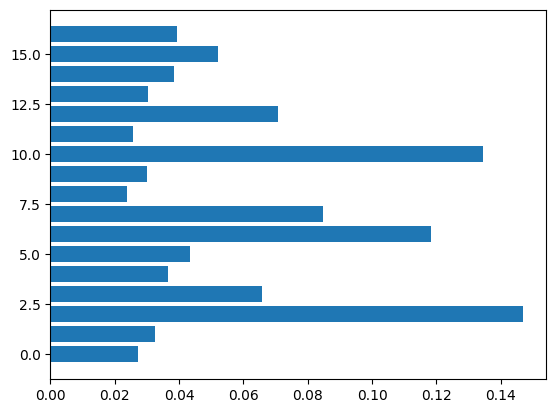

In [24]:
# Calculate feature importances
clf = RandomForestClassifier()
clf.fit(X, y)
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

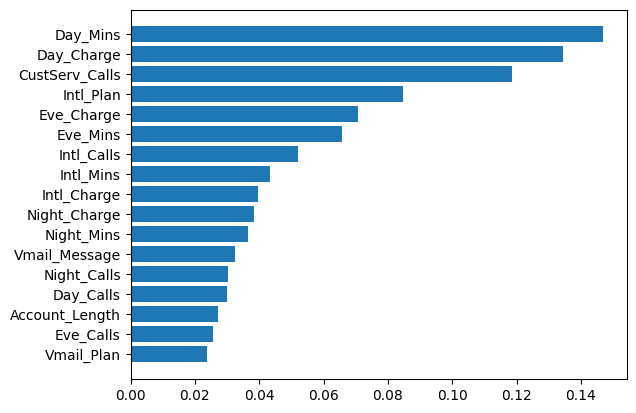

In [25]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

Correct! The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. What if we added additional sources of data and more features? Let's explore this now.

6 new features have been added to the telco DataFrame:

    Region_Code
    Cost_Call
    Total_Charge
    Total_Minutes
    Total_Calls
    Min_Call
Will this improve the churn model? Let's find out!

In [26]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))

0.941


In [27]:
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))

0.7870036101083033
